In [8]:
import os
import pandas as pd
import numpy as np
import librosa
import warnings
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [9]:
dataset_path = "./dataset"
genres = os.listdir(os.path.join(dataset_path, 'genres_original'))

In [10]:
y, sr = librosa.load(f"{dataset_path}/genres_original/rock/rock.00001.wav")

print("y:", y)
print("y shape:", np.shape(y))
print("sample rate:", sr)

y: [0.36239624 0.6494751  0.6317444  ... 0.04336548 0.0557251  0.05700684]
y shape: (661794,)
sample rate: 22050


In [11]:
audio,_ = librosa.effects.trim(y)
print("y:", y)
print("duration:", audio.shape[0]/sr)

y: [0.36239624 0.6494751  0.6317444  ... 0.04336548 0.0557251  0.05700684]
duration: 30.013333333333332


In [12]:
audio_file, _ = librosa.effects.trim(y)

print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.36239624 0.6494751  0.6317444  ... 0.04336548 0.0557251  0.05700684] 

Audio File shape: (661794,)


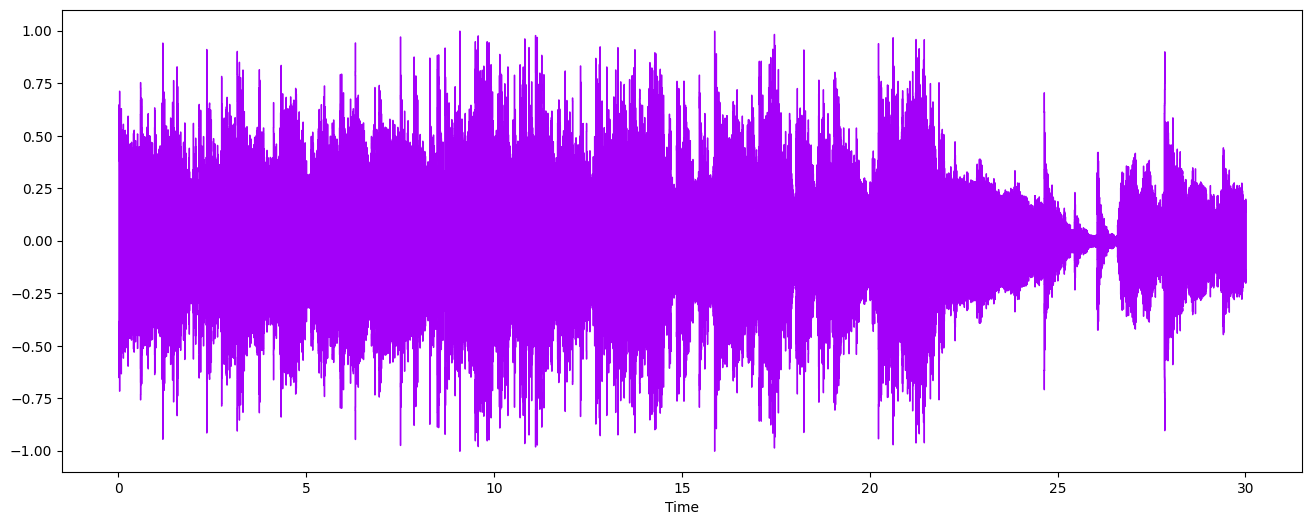

In [15]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
#plt.title("", fontsize = 23);

In [14]:
for i in genres:
    aud,sr=librosa.load(os.path.join(path,'genres_original',i,f'{i}.00001.wav'))
    plt.figure(figsize=(10,4))
    librosa.display.waveshow(y=aud,sr=sr,color='b')
    #plt.title(f'')

NameError: name 'path' is not defined

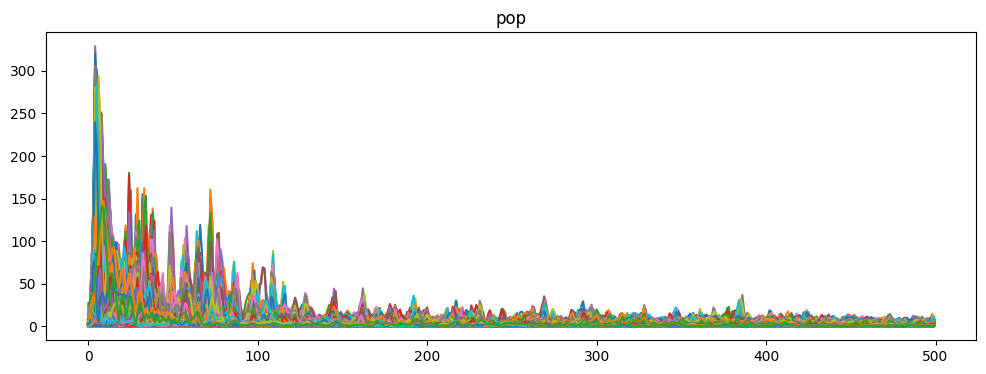

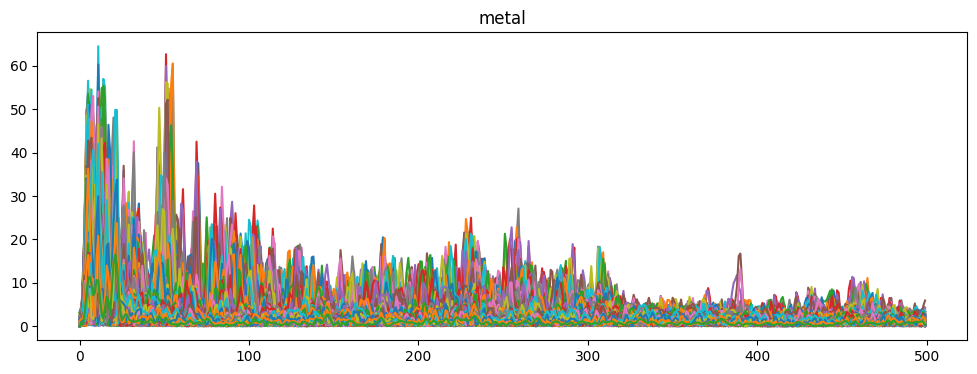

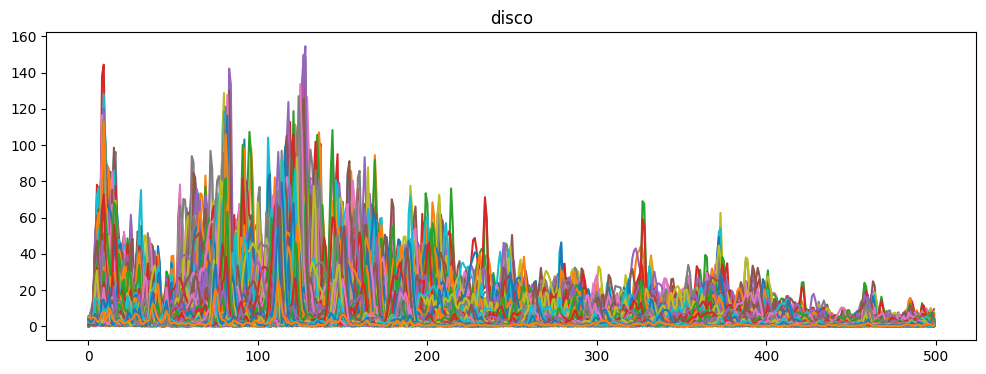

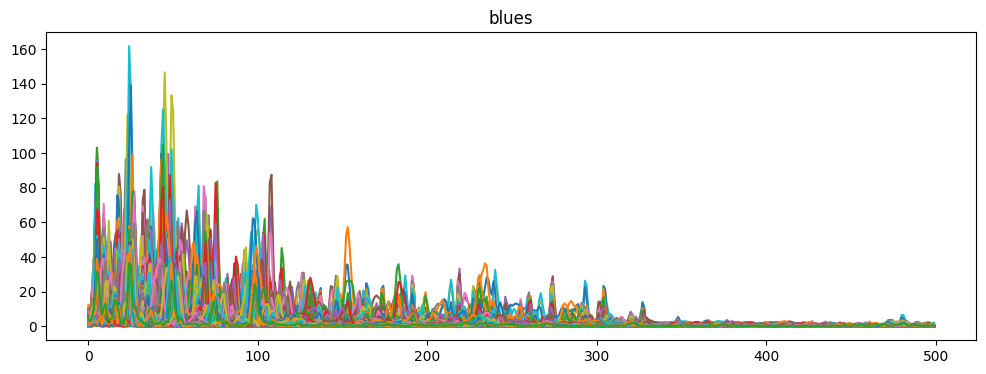

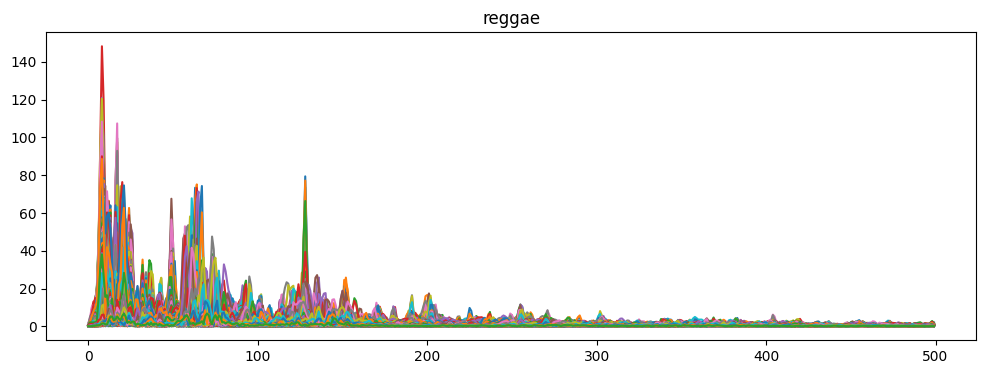

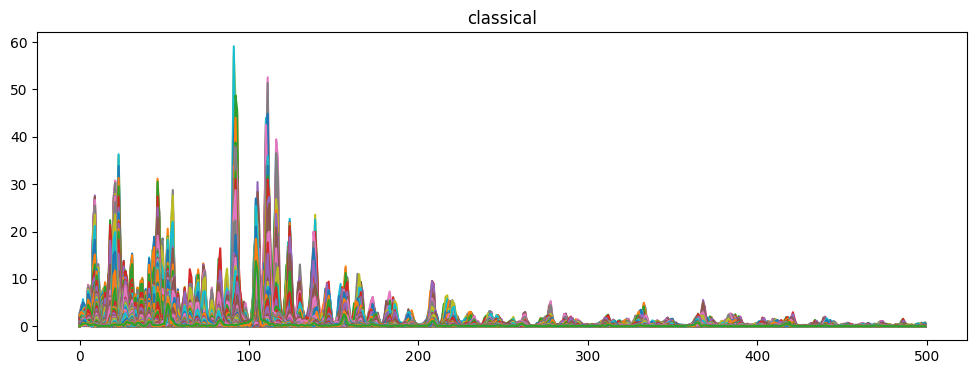

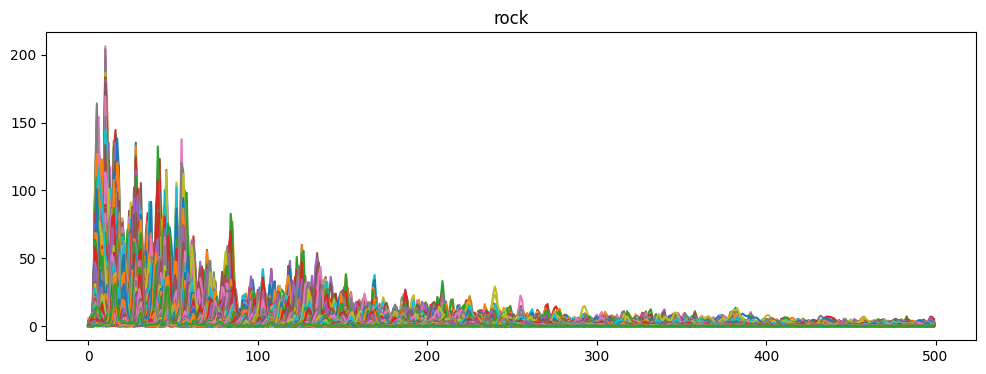

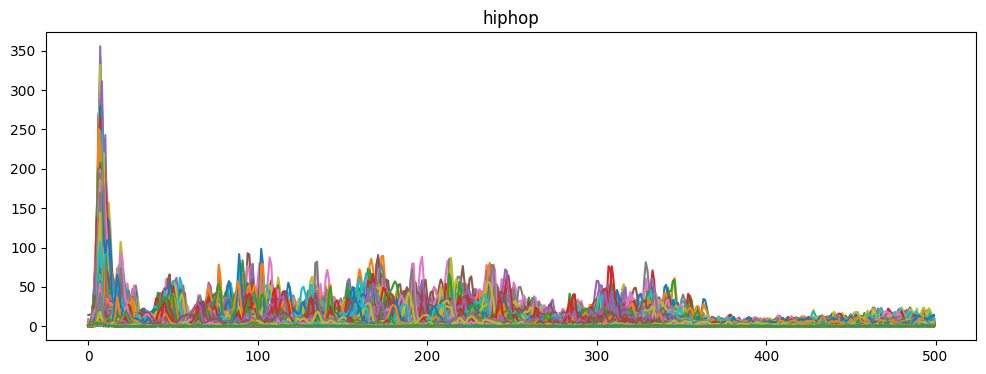

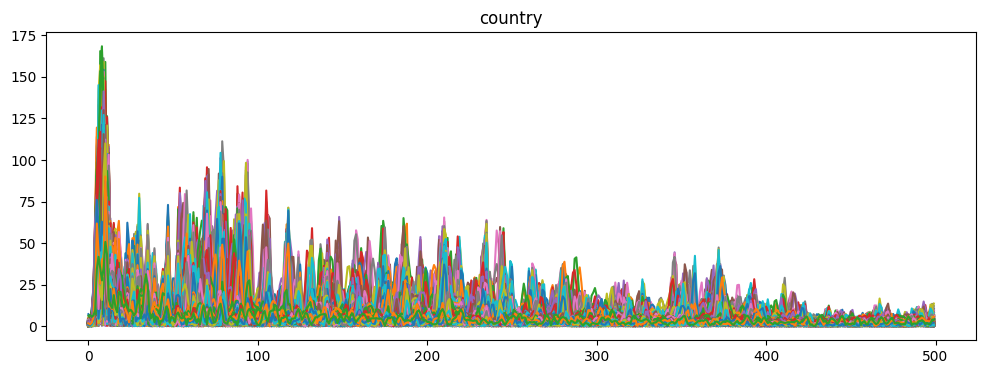

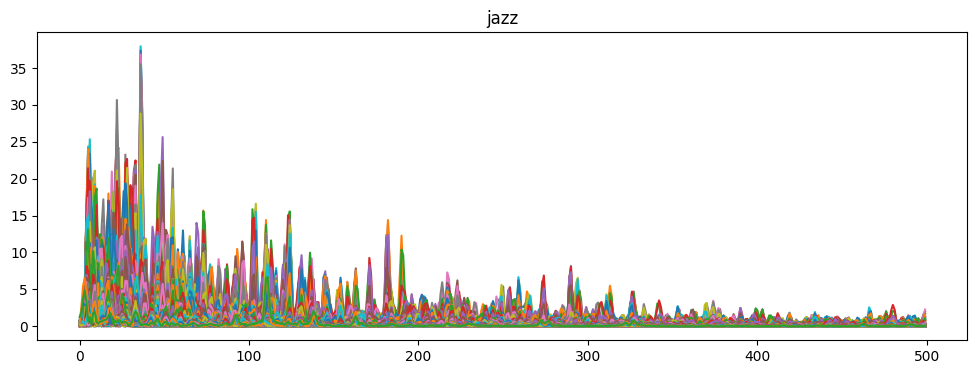

In [20]:
n_fft=2048 #default value recommended, n_ftt represents the number of samples that will be converted at once.
hop_length=512 #understandable by name
win_length=2048 #window using which samples are converted.

for i in genres:
    aud,sr=librosa.load(os.path.join(path,'genres_original',i,f'{i}.00001.wav'))
    aud_ft= np.abs(librosa.stft(aud, n_fft = n_fft, hop_length = hop_length,win_length=win_length))
#     print(np.shape(aud_ft)) #(1025,1302) 
    plt.figure(figsize=(12,4))
    plt.plot(aud_ft[:500,:])#viewing only upto 500 Hz
    plt.title(f'{i}')

In [21]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


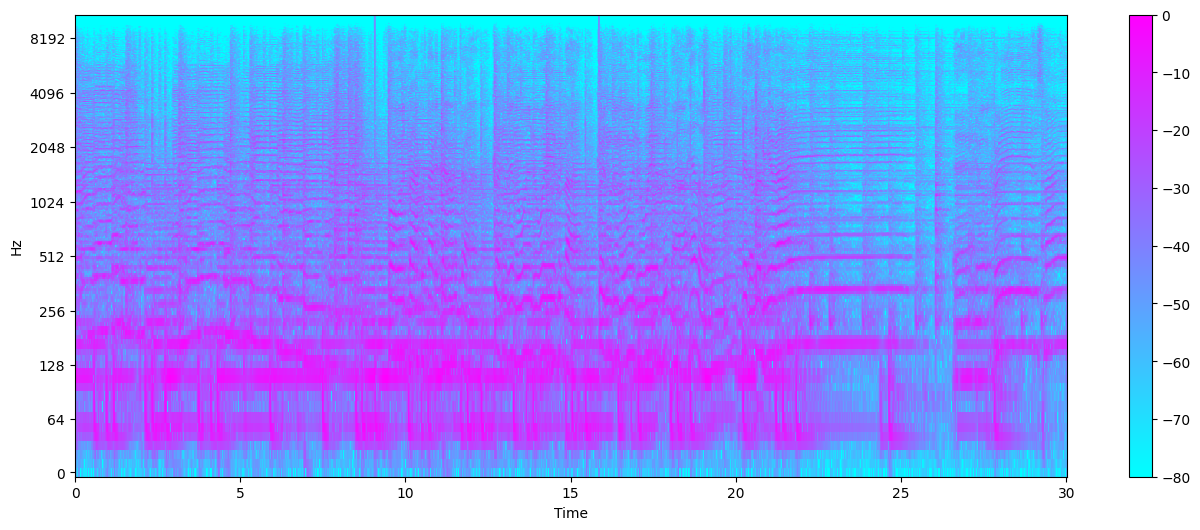

In [22]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool')
plt.colorbar();

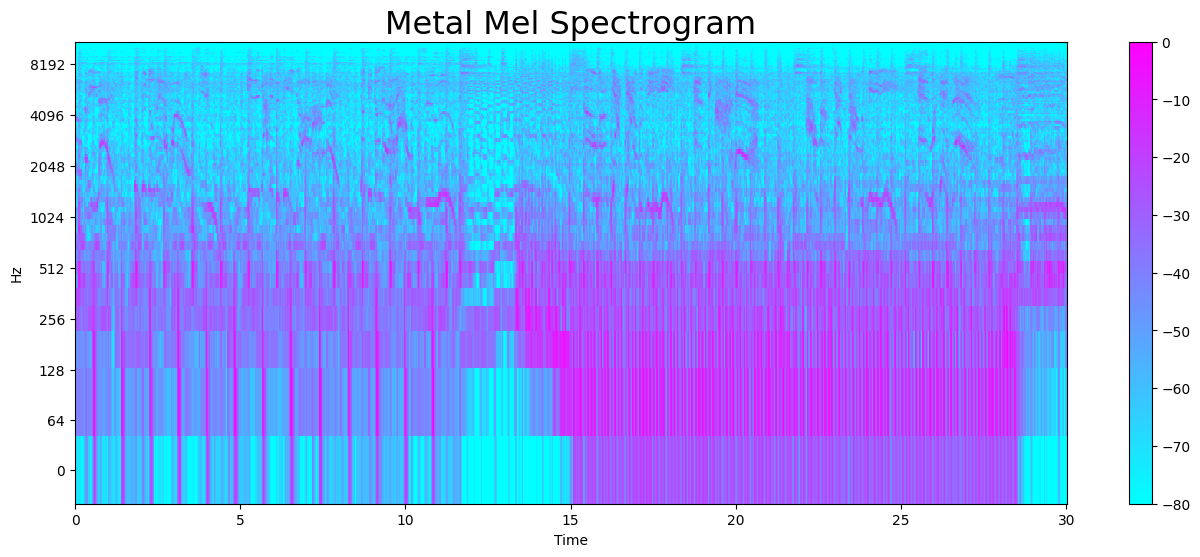

In [26]:
y, sr = librosa.load(f'{dataset_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

In [27]:
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

36426


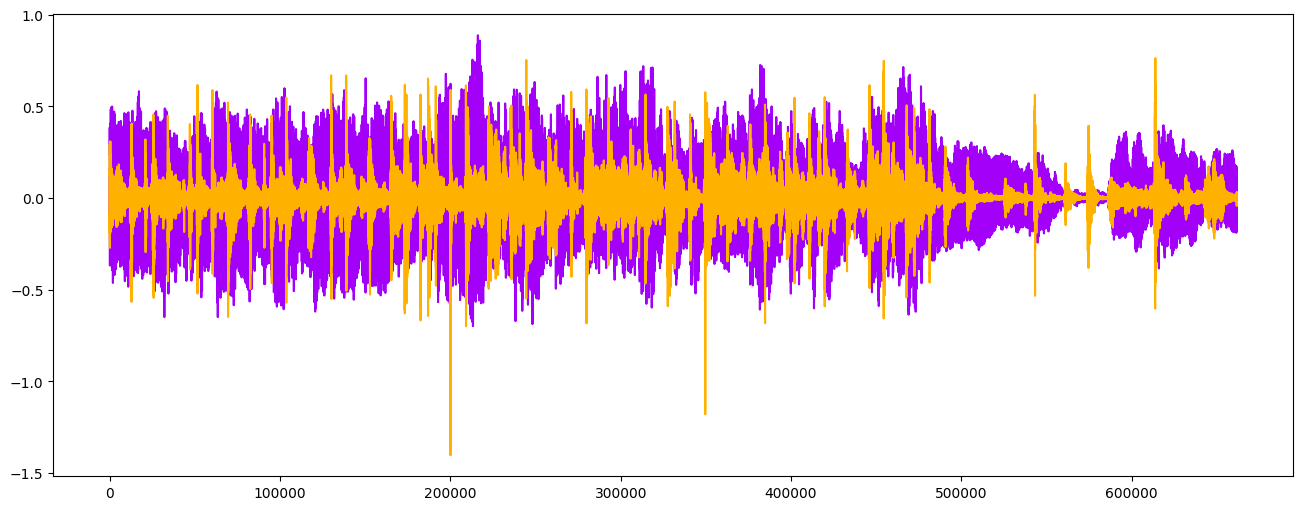

In [28]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

In [30]:
tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
tempo

143.5546875

mfccs shape: (20, 1293)


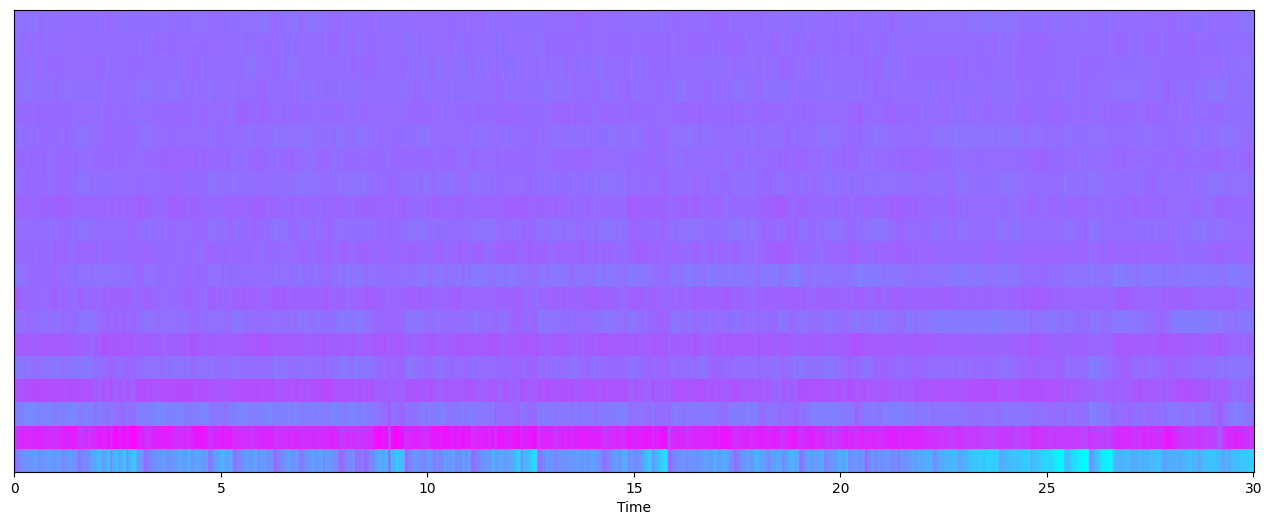

In [32]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Mean: -4.4254028e-10 

Var: 1.0


/Users/adamjedrzejewski/code/thesis/env/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/adamjedrzejewski/code/thesis/env/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


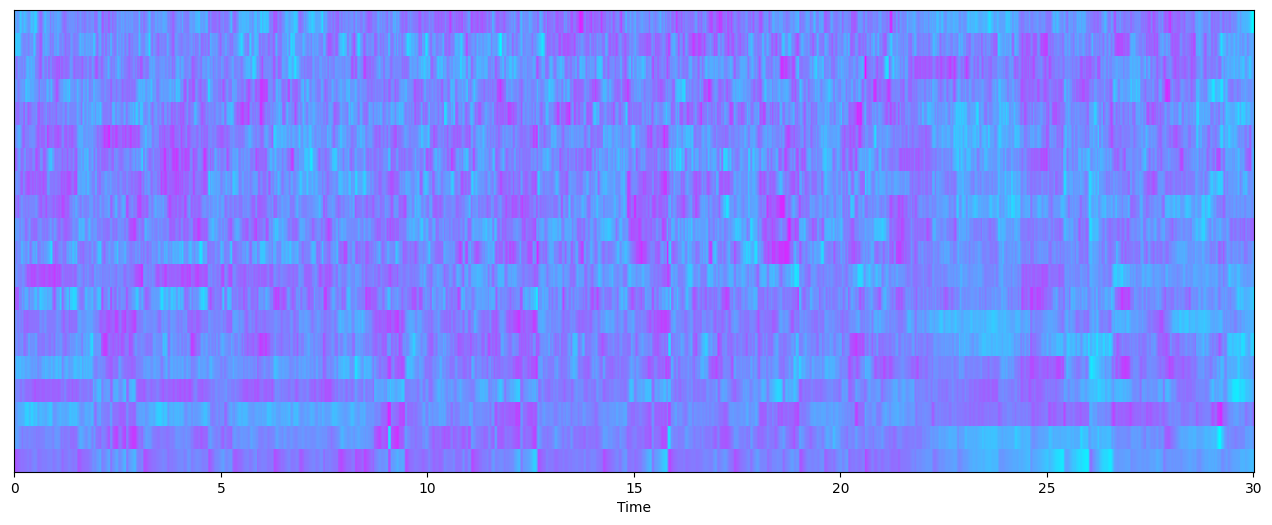

In [34]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

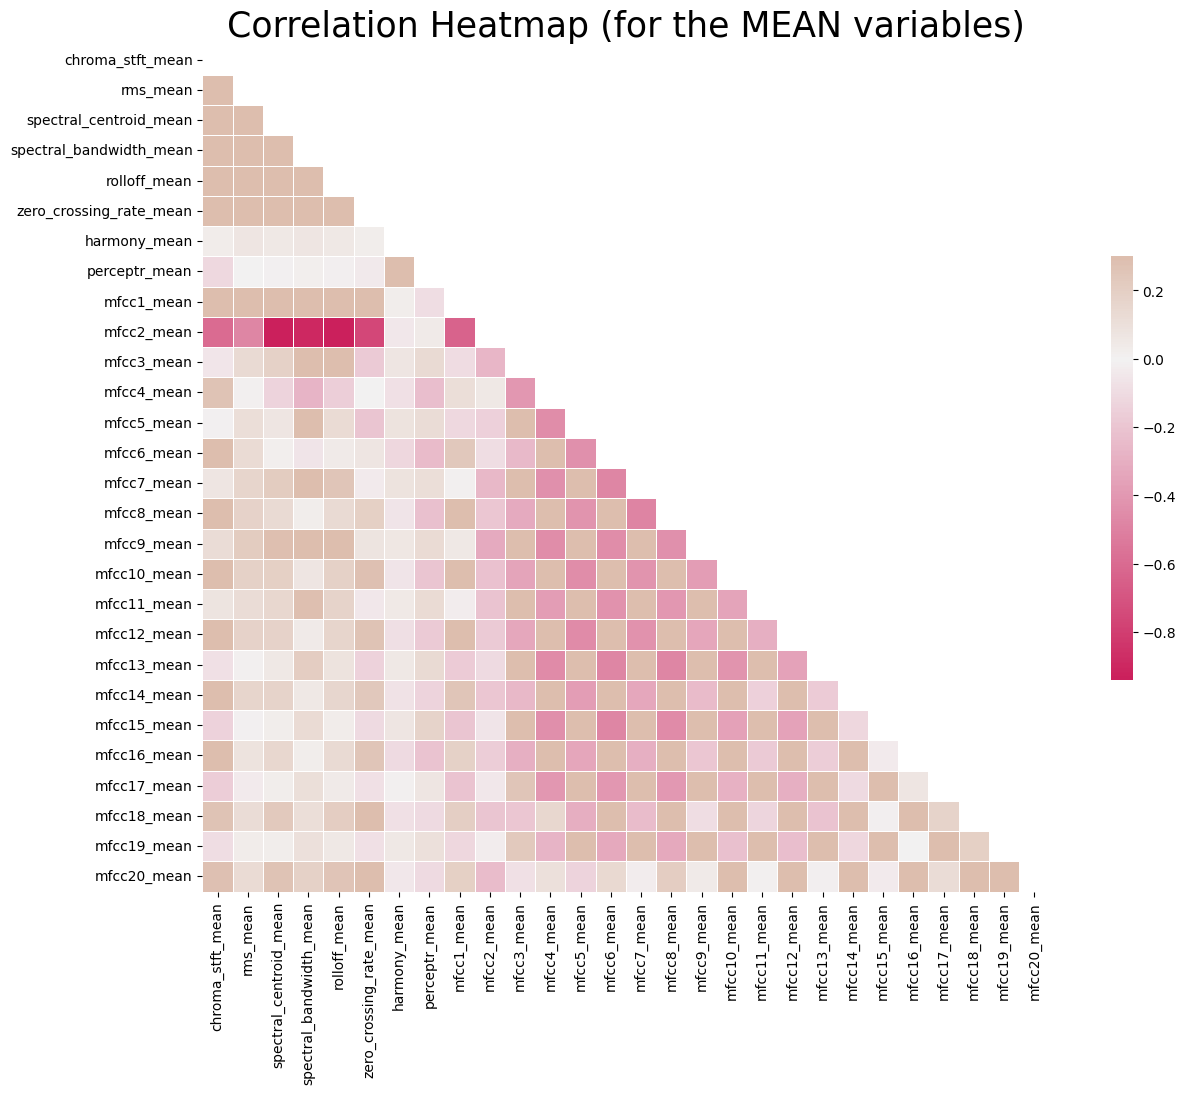

In [40]:
data = pd.read_csv(f'{dataset_path}/features_30_sec.csv')
data.head()
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")